In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D

In [2]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def convert_image(file):
   return np.array(Image.open(file).convert('L'))

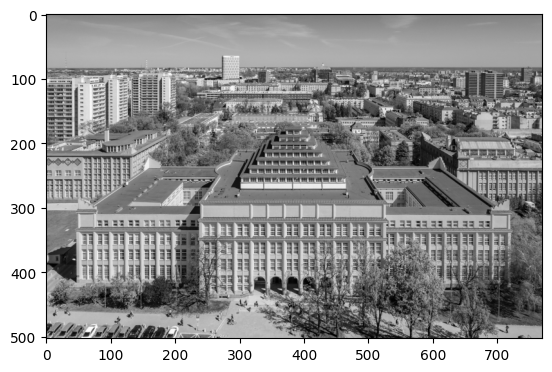

In [5]:
image = convert_image('SGH.jpg')
image.shape
plt.imshow(image, cmap='gray')

In [ ]:
model = Sequential(
   Conv2D(filters=1,
   kernel_size=(5,5),
   input_shape=(503, 770, 1))
)

In [44]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 499, 766, 1)       26        
                                                                 
Total params: 26 (104.00 Byte)
Trainable params: 26 (104.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [45]:
image4Conv = tf.expand_dims(image, 0)
image4Conv = tf.expand_dims(image4Conv, -1)
image4Conv.shape

TensorShape([1, 503, 770, 1])

In [46]:
result = model.predict(image4Conv)
result.shape

1/1 [==============================] - 0s 44ms/step


(1, 499, 766, 1)

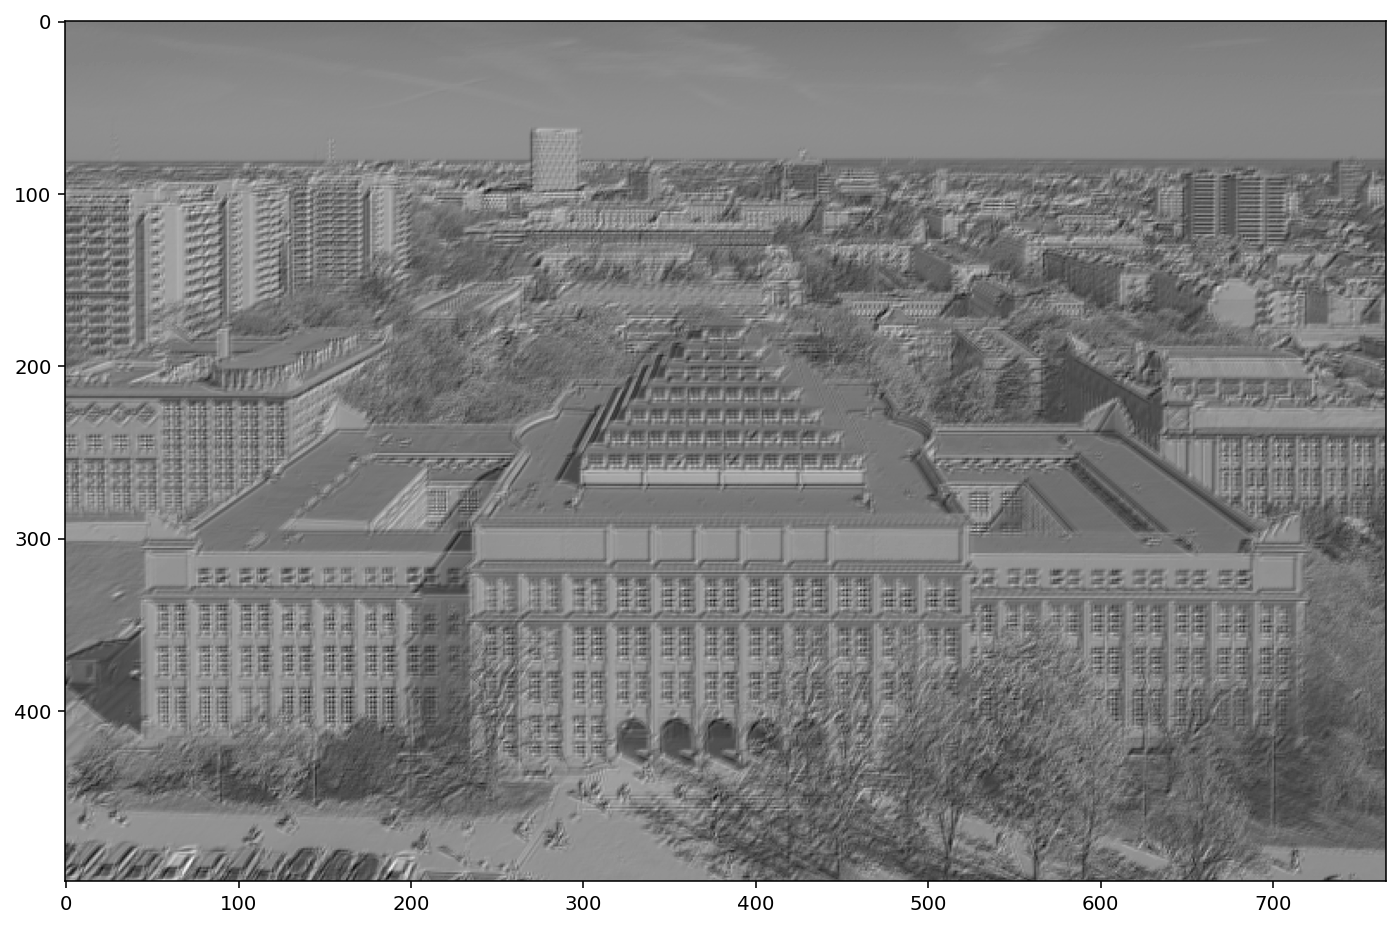

In [49]:
result = tf.squeeze(result)
result.shape
plt.imshow(result, cmap='gray')

In [59]:
from tensorflow.keras import backend as K

def my_filter(shape, dtype=None):
   # Ustawiamy filtr na detekcję pionowych i poziomych krawędzi
   f = np.array([
         [[[-1]], [[-1]], [[-1]], [[-1]], [[-1]]],
         [[[-1]], [[-1]], [[-1]], [[-1]], [[-1]]],
         [[[-1]], [[-1]], [[24]], [[-1]], [[-1]]],
         [[[-1]], [[-1]], [[-1]], [[-1]], [[-1]]],
         [[[-1]], [[-1]], [[-1]], [[-1]], [[-1]]],
   ])
   return K.variable(f, dtype='float32')

1/1 [==============================] - 0s 63ms/step


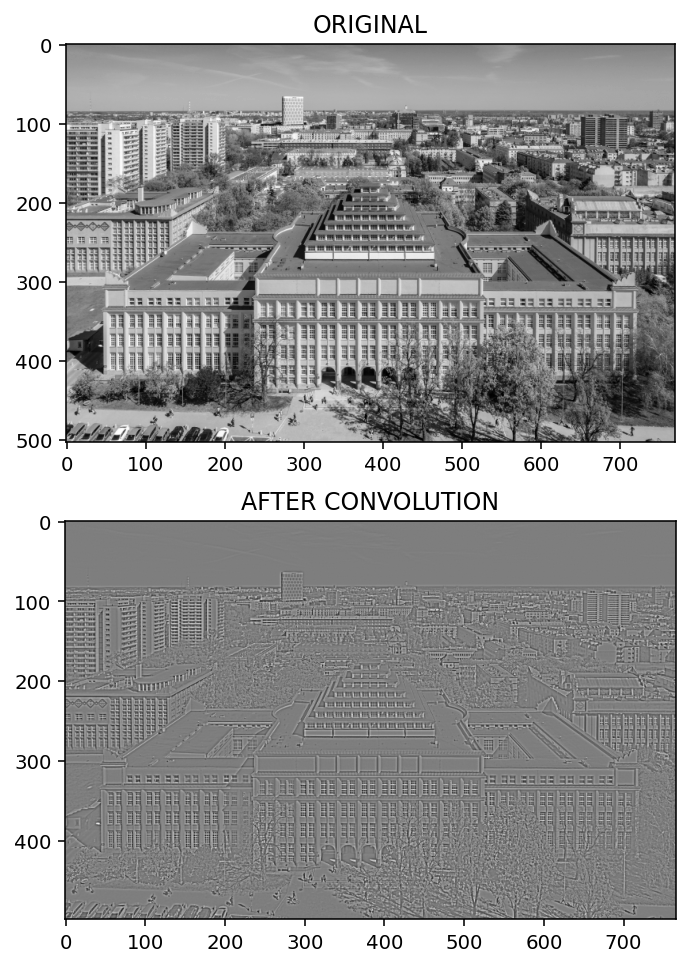

In [61]:
model_edge = Sequential(
   Conv2D(filters=1,
          kernel_size=(5,5),
          kernel_initializer=my_filter,
          input_shape=(503, 770, 1))
)

result_edge = model_edge.predict(image4Conv)
result_edge.shape

result_edge = tf.squeeze(result_edge)
result_edge.shape

plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 142
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax1.imshow(image, cmap='gray')
ax1.set_title('ORIGINAL')
ax2 = fig.add_subplot(2,1,2)
ax2.imshow(result_edge, cmap='gray')
ax2.set_title('AFTER CONVOLUTION')
plt.show()

1/1 [==============================] - 0s 75ms/step


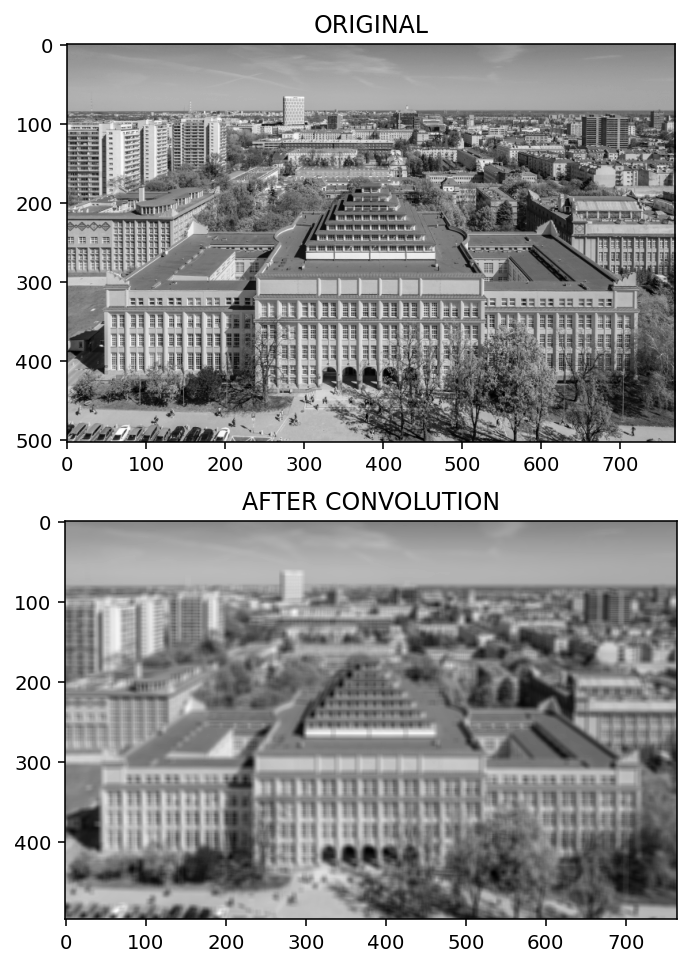

In [24]:
def my_filter(shape, dtype=None):
   f = np.empty(shape=(7,7,1,1))
   f.fill(1/49)
   return K.variable(f, dtype='float32')

model_blur = Sequential(Conv2D(filters=1, kernel_size=(7,7), kernel_initializer=my_filter, input_shape=(503, 770, 1)))
result_blur = model_blur.predict(image4Conv)
result_blur.shape

result_blur = tf.squeeze(result_blur)

fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax1.imshow(image, cmap='gray')
ax1.set_title('ORIGINAL')
ax2 = fig.add_subplot(2,1,2)
ax2.imshow(result_blur, cmap='gray')
ax2.set_title('AFTER CONVOLUTION')
plt.show()
